* Assignment 2
* Student Name : Aswani Pottathuparambil Unnikrishnan
* Student Id : 8858117

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


* Data Analysis

In [2]:

# Load the dataset
df = pd.read_csv('C:/Users/aswan/OneDrive/Desktop/AIML/heart.csv')

# Display 5 samples randomly
df.sample(5)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
682,58,F,ATA,136,319,1,LVH,152,N,0.0,Up,1
155,56,M,ASY,155,342,1,Normal,150,Y,3.0,Flat,1
338,63,M,ASY,140,0,1,LVH,149,N,2.0,Up,1
47,50,M,ATA,140,216,0,Normal,170,N,0.0,Up,0


In [3]:
# Display the dataset size
df.shape

(918, 12)

In [4]:
# Get dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


* Data Preprocessing

In [5]:
# Check null values
df.isnull().values.any()

False

In [6]:
# Remove duplicate values
print(f'Original data set dimension: {df.shape}')
df.shape
df.drop_duplicates(inplace=True)
df.shape
print(f'Data set dimension after removing duplicates: {df.shape}')

Original data set dimension: (918, 12)
Data set dimension after removing duplicates: (918, 12)


* Observation : There is no null or duplicate values in the data set

2.Remove outliers using mean,median,Z score. 

In [7]:
# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['int64', 'float64'])))

filter_con = (z_scores < 3).all(axis=1)

# Remove outliers
df = df[filter_con]

In [8]:
df.shape

(899, 12)

* There were outliers. After the removal of outliers dataset rows were reduced to 899.

3.Convert text columns to numbers using label encoding and one hot encoding

In [9]:
# text columns
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Do label encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
   


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             899 non-null    int64  
 1   Sex             899 non-null    int32  
 2   ChestPainType   899 non-null    int32  
 3   RestingBP       899 non-null    int64  
 4   Cholesterol     899 non-null    int64  
 5   FastingBS       899 non-null    int64  
 6   RestingECG      899 non-null    int32  
 7   MaxHR           899 non-null    int64  
 8   ExerciseAngina  899 non-null    int32  
 9   Oldpeak         899 non-null    float64
 10  ST_Slope        899 non-null    int32  
 11  HeartDisease    899 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 73.7 KB


In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


HeartDisease
1    492
0    407
Name: count, dtype: int64


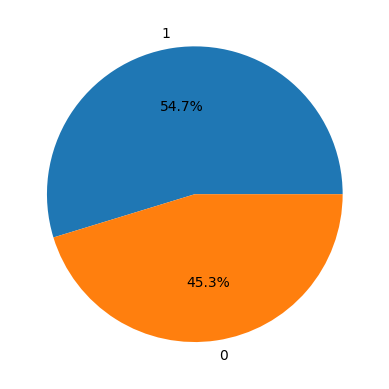

In [12]:
# Plot the diagram to check whether the dataset is balanced or not.
x = df['HeartDisease'].value_counts()
print(x)
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()

There is a slight difference in average for the data for both having heart disease(54.7%) and not having the disease(45.3%). 


4.Apply scaling


In [13]:

scaler = StandardScaler()
# Splitting the data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_scaled = scaler.fit_transform(X)

# Step 5: Build SVM classification models (Standalone and Bagging)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# Print Features
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [15]:
# Print target
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 899, dtype: int64

5.Build a machine learning classification model using support vector machine. 
  Demonstrate the standalone model as well as Bagging model and include observations about the oerformance


In [16]:
# Standalone Model
svm_standalone_model = SVC(kernel='linear')
svm_standalone_model.fit(X_train, y_train)


SVC(kernel='linear')

In [17]:
y_pred_svm_standalone_model = svm_standalone_model.predict(X_test)

In [18]:
# SVM Bagging model
svm_bagging_model = BaggingClassifier(estimator=SVC(kernel='linear'),
                                  n_estimators=500, max_samples=0.8,
                                  oob_score=True, 
                                  random_state=16)
svm_bagging_model.fit(X_train, y_train)


BaggingClassifier(estimator=SVC(kernel='linear'), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=16)

In [19]:
y_pred_svm_bagging_model = svm_bagging_model.predict(X_test)

* SVM standalone & bagging model performance comaprison

In [20]:
print("\n SVM Standalone Model")
print("================================")

print(f"\nAccuracy :  {accuracy_score(y_test, y_pred_svm_standalone_model)}")

print(f"\nConfusion matrix :\n { confusion_matrix(y_test, y_pred_svm_standalone_model)}")

print(f"\nRecall :  {recall_score(y_test, y_pred_svm_standalone_model)}")

print(f"\nPrecision :  {precision_score(y_test, y_pred_svm_standalone_model)}")

print(f"\nF1 score :  {f1_score(y_test, y_pred_svm_standalone_model)}")



 SVM Standalone Model

Accuracy :  0.8611111111111112

Confusion matrix :
 [[66 20]
 [ 5 89]]

Recall :  0.9468085106382979

Precision :  0.8165137614678899

F1 score :  0.8768472906403939


In [21]:
print("\n\nSVM Bagging Model")
print("================================")


print(f"\nAccuracy :  {accuracy_score(y_test, y_pred_svm_bagging_model)}")

print(f"\nConfusion matrix :\n { confusion_matrix(y_test, y_pred_svm_bagging_model)}")

print(f"\nRecall :  {recall_score(y_test, y_pred_svm_bagging_model)}")

print(f"\nPrecision :  {precision_score(y_test, y_pred_svm_bagging_model)}")

print(f"\nF1 score :  {f1_score(y_test, y_pred_svm_bagging_model)}")



SVM Bagging Model

Accuracy :  0.8666666666666667

Confusion matrix :
 [[67 19]
 [ 5 89]]

Recall :  0.9468085106382979

Precision :  0.8240740740740741

F1 score :  0.8811881188118812


Observation: 
* SVM Bagging Model shows slightly better performance in terms of accuracy, precision, and F1 score compared to the SVM Standalone Model. Both models have the same recall, indicating they perform equally well in identifying positive cases

6.Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance


In [22]:
dt_standalone_model = DecisionTreeClassifier(random_state=42)
dt_standalone_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
y_pred_dt_standalone_model = dt_standalone_model.predict(X_test)

In [24]:
dt_bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples=0.8, 
    oob_score=True,
    random_state=16
)
dt_bagging_model.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=500, oob_score=True, random_state=16)

In [25]:
y_pred_dt_bagging_model = dt_bagging_model.predict(X_test)

* Decision Tree standalone and bagging model comparison

In [26]:
print("\n Decision Tree Classifier Standalone Model")
print("================================")

print(f"\nAccuracy :  {accuracy_score(y_test, y_pred_dt_standalone_model)}")

print(f"\nConfusion matrix :\n { confusion_matrix(y_test, y_pred_dt_standalone_model)}")

print(f"\nRecall :  {recall_score(y_test, y_pred_dt_standalone_model)}")

print(f"\nPrecision :  {precision_score(y_test, y_pred_dt_standalone_model)}")

print(f"\nF1 score :  {f1_score(y_test, y_pred_dt_standalone_model)}")





 Decision Tree Classifier Standalone Model

Accuracy :  0.7888888888888889

Confusion matrix :
 [[70 16]
 [22 72]]

Recall :  0.7659574468085106

Precision :  0.8181818181818182

F1 score :  0.7912087912087913


In [27]:
print("\n\nDecision Tree Classifier Bagging Model")
print("================================")


print(f"\nAccuracy :  {accuracy_score(y_test, y_pred_dt_bagging_model)}")

print(f"\nConfusion matrix :\n { confusion_matrix(y_test, y_pred_dt_bagging_model)}")

print(f"\nRecall :  {recall_score(y_test, y_pred_dt_bagging_model)}")

print(f"\nPrecision :  {precision_score(y_test, y_pred_dt_bagging_model)}")

print(f"\nF1 score :  {f1_score(y_test, y_pred_dt_bagging_model)}")



Decision Tree Classifier Bagging Model

Accuracy :  0.8611111111111112

Confusion matrix :
 [[71 15]
 [10 84]]

Recall :  0.8936170212765957

Precision :  0.8484848484848485

F1 score :  0.8704663212435233


Observation : 
* Overall, the Decision Tree Classifier Bagging Model performs better in terms of a variety of parameters. Accuracy, recall, and F1 score are all greater. As a result, it appears that the Bagging Model performs more evenly and is particularly good at properly recognising positive cases (high recall).

7.Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

Observation: 
* From the performance values of  4 models, it makes more sense to consider bagging into account Decision Trees when comparing SVM with Decision Tree models, especially when working with complicated or noisy datasets.
* Bagging generates a more robust and dependable model that can manage the complexity and noise contained in the dataset by assembling a collection of models trained on various subsets of data. It is a crucial tool for enhancing the performance and stability of machine learning models in difficult data conditions.